In [36]:
# Pré-processamento e divisão de dados
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler


# Métricas e avaliação
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

# Utilidades
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk





## Exploração Básica

In [37]:
df = pd.read_csv("water_potability.csv")

In [38]:
lista_colunas = df.columns.tolist()
print(lista_colunas)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [39]:
df.count()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability         3276
dtype: int64

In [40]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Entendimento
* Potabilidade = 0, Água Potável Insegura
* Potabilidade = 1, Água Potável Segura

In [41]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#### Com base nas informações apresentadas na tabela acima, é evidente que existem alguns valores nulos ou ausentes. O comando a seguir pode ser usado para determinar a contagem de valores ausentes em cada coluna respectiva.


In [42]:
# Calculando a porcentagem de valores ausentes em cada coluna
porcentagem_vazios = df.isna().sum() / len(df) * 100
print(porcentagem_vazios)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


<Axes: >

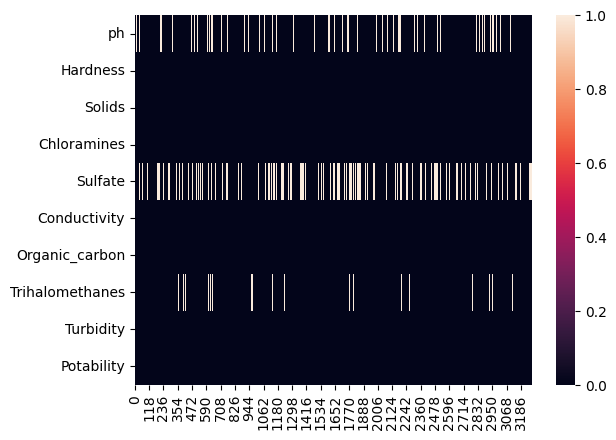

In [43]:
#Criando um mapa de calor para visualizar a distribuição de valores ausentes nas colunas do df transposto valores entre colunas no df transposto
sns.heatmap(df.isna().transpose())

## Lidando com valores ausentes


#### Ao observar o mapa de calor apresentado anteriormente, constata-se que três colunas contêm valores ausentes, ou seja, pH, sulfato e trihalometanos. A detecção de valores ausentes em determinadas colunas inicia uma análise de valores discrepantes. Vamos verificar se há valores discrepantes nessas colunas, pois eles podem impactar significativamente a análise dos dados.

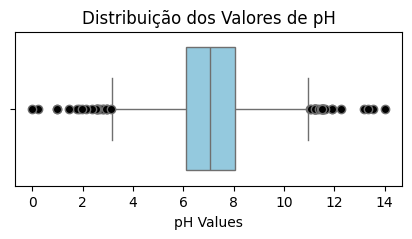

In [44]:

#Verificando outliers na coluna ph
plt.figure(figsize=(5,2))
sns.boxplot(x = "ph", data = df, color = "skyblue", flierprops = dict(markersize = 6, markerfacecolor = "black"))
plt.xlabel("pH Values")
plt.title("Distribuição dos Valores de pH")
plt.show()

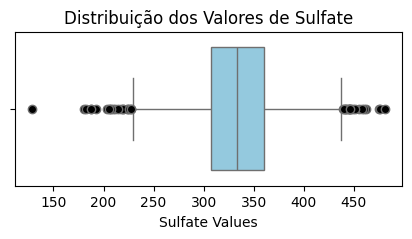

In [45]:
#Verificando outliers na coluna de sulfato
plt.figure(figsize=(5,2))
sns.boxplot(x = "Sulfate", data = df, color = "skyblue", flierprops = dict(markersize = 6, markerfacecolor = "black"))
plt.xlabel("Sulfate Values")
plt.title("Distribuição dos Valores de Sulfate")
plt.show()

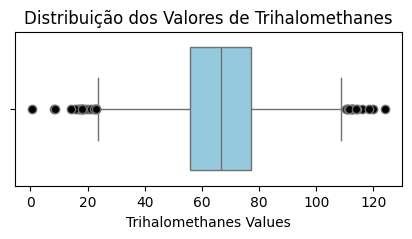

In [46]:
#Verificando outliers na coluna Trihalometanos
plt.figure(figsize=(5,2))
sns.boxplot(x = "Trihalomethanes", data = df, color = "skyblue", flierprops = dict(markersize = 6, markerfacecolor = "black"))
plt.xlabel("Trihalomethanes Values")
plt.title("Distribuição dos Valores de Trihalomethanes")
plt.show()

#### Compreendendo o valor da assimetria
* 0 indica uma distribuição perfeitamente simétrica.
* Maior que 0 (assimetria positiva) indica uma distribuição assimétrica à direita (cauda à direita).
* Menor que 0 (assimetria negativa) indica uma distribuição assimétrica à esquerda (cauda à esquerda).

In [47]:
#Calculando a assimetria para cada coluna no df
skew_values = df.skew()
print(skew_values)

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
Potability         0.450784
dtype: float64


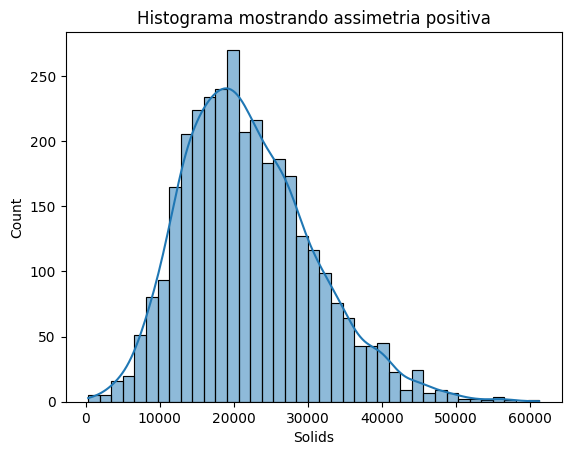

In [48]:

sns.histplot(x = "Solids", data = df, kde = True)
plt.xlabel("Solids")
plt.ylabel("Count")
plt.title("Histograma mostrando assimetria positiva")

plt.show()



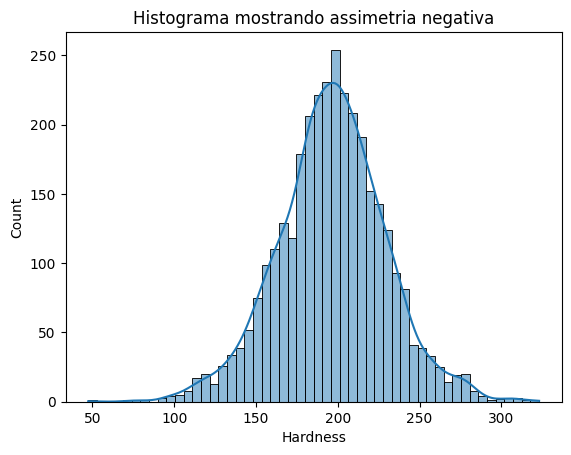

In [49]:
sns.histplot(x = "Hardness", data = df, kde = True)
plt.xlabel("Hardness")
plt.ylabel("Count")
plt.title("Histograma mostrando assimetria negativa")
plt.show()

In [50]:
# Calculando a média para "ph", "Sulfate" e "Trihalomethanes"
median_value1 = df["ph"].median()
median_value2 = df["Sulfate"].median()
median_value3 = df["Trihalomethanes"].median()

In [51]:
# prenchendo valores vazios em "ph", "Sulfate" e "Trihalomethanes"  com suas médias
df["ph"].fillna(median_value1, inplace = True)
df["Sulfate"].fillna(median_value2, inplace = True)
df["Trihalomethanes"].fillna(median_value3, inplace = True)

C:\Users\guilhermecosta-ieg\AppData\Local\Temp\ipykernel_19436\3478182337.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ph"].fillna(median_value1, inplace = True)
C:\Users\guilhermecosta-ieg\AppData\Local\Temp\ipykernel_19436\3478182337.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

## Alvinho
#### 0 - não ta legal
#### 1 - tá legal


In [52]:
# vendo a distribuição da nossa vriavel target
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

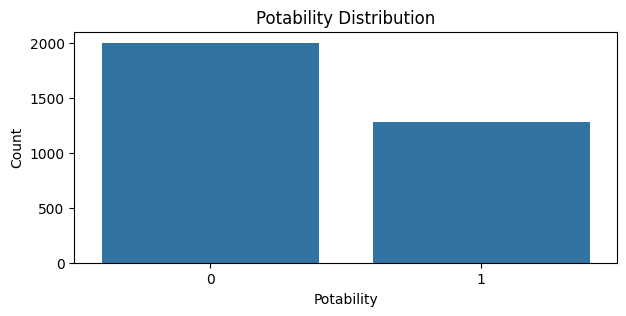

In [53]:
# diferença olhando para um gráfico
plt.figure(figsize = (7,3))
sns.countplot(x = "Potability", data = df)
plt.xlabel("Potability")
plt.ylabel("Count")
plt.title("Potability Distribution")
plt.show()

In [54]:
# Agrupando pela target e vendo quais o valores médios refente a todas as outras colunas
df.groupby("Potability").mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.077736,196.733292,21777.490788,7.092175,334.200184,426.730454,14.364335,66.320635,3.965800
1,7.068655,195.800744,22383.991018,7.169338,332.683125,425.383800,14.160893,66.543247,3.968328


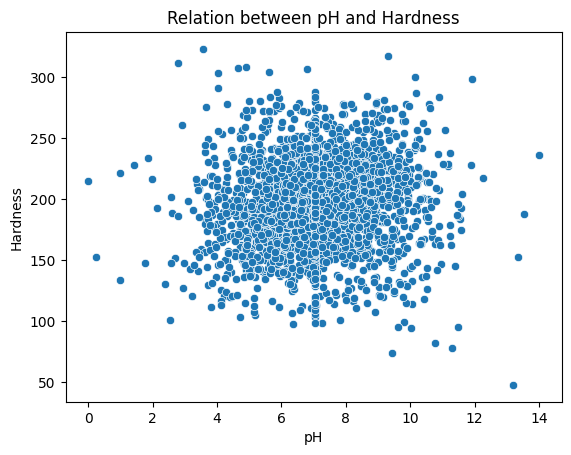

In [55]:
# Criando um gráfico de dispersão para explorar a relação entre "ph" e "Dureza"
sns.scatterplot(x = "ph", y = "Hardness", data = df)
plt.xlabel("pH")
plt.ylabel("Hardness")
plt.title("Relation between pH and Hardness")
plt.show()

#### relações entre variáveis para determinar​​ quais pares de colunas têm conexões mais fortes e mais fracas em termos de associação linear.


In [56]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075760,-0.082004,-0.031741,0.014178,0.017466,0.040240,0.003145,-0.036107,-0.003014
Hardness,0.075760,1.000000,-0.046899,-0.030054,-0.092833,-0.023915,0.003610,-0.012707,-0.014449,-0.013837
Solids,-0.082004,-0.046899,1.000000,-0.070148,-0.149747,0.013831,0.010242,-0.008799,0.019546,0.033743
Chloramines,-0.031741,-0.030054,-0.070148,1.000000,0.023762,-0.020486,-0.012653,0.016614,0.002363,0.023779
Sulfate,0.014178,-0.092833,-0.149747,0.023762,1.000000,-0.014182,0.027102,-0.025657,-0.009767,-0.020476
Conductivity,0.017466,-0.023915,0.013831,-0.020486,-0.014182,1.000000,0.020966,0.001184,0.005798,-0.008128
Organic_carbon,0.040240,0.003610,0.010242,-0.012653,0.027102,0.020966,1.000000,-0.012958,-0.027308,-0.030001
Trihalomethanes,0.003145,-0.012707,-0.008799,0.016614,-0.025657,0.001184,-0.012958,1.000000,-0.021487,0.006887
Turbidity,-0.036107,-0.014449,0.019546,0.002363,-0.009767,0.005798,-0.027308,-0.021487,1.000000,0.001581
Potability,-0.003014,-0.013837,0.033743,0.023779,-0.020476,-0.008128,-0.030001,0.006887,0.001581,1.000000


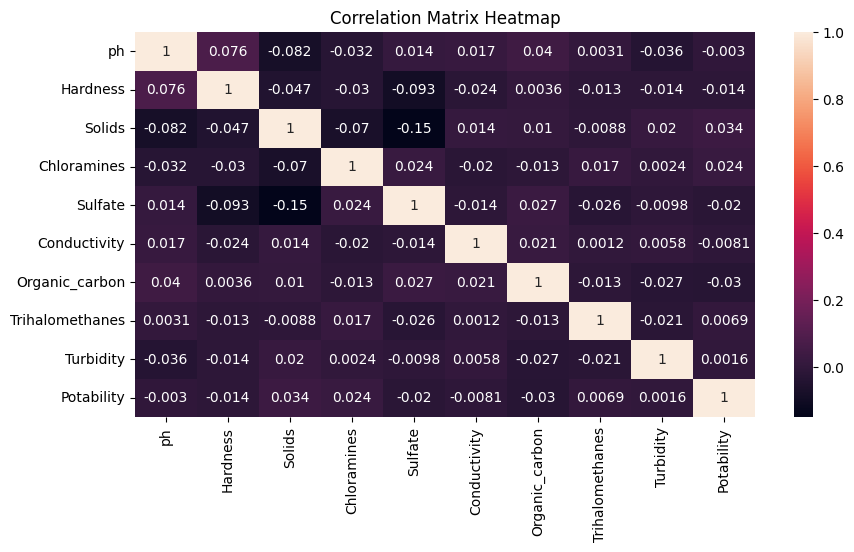

In [57]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Matrix Heatmap")
plt.show()



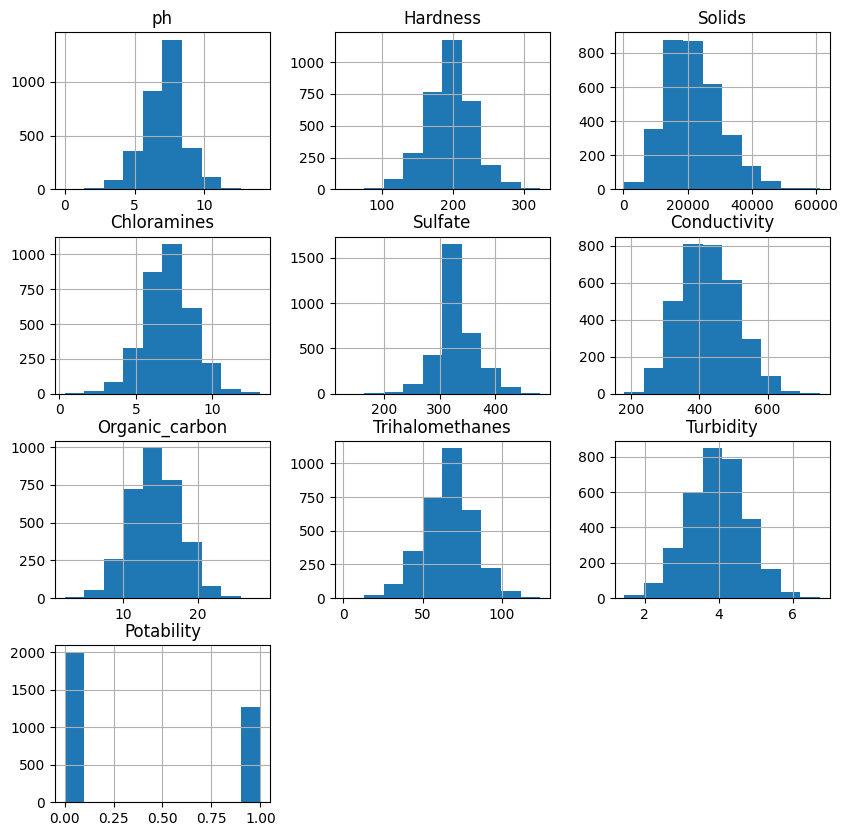

In [58]:
df.hist(figsize=(10,10))
plt.show()

## Dividindo a Variável Característica e a Variável-Alvo

In [59]:
X = df.iloc[:, :9]
y = df.Potability 


## Dimensionamento de recursos.  first import é aqui

Scaler = você cria um objeto que sabe calcular a média e o desvio padrão de cada coluna.

fit → calcula a média e o desvio padrão de cada coluna de X.
transform → aplica a fórmula de padronização do Nosso professor Daniel


In [ ]:

# scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

X = scaler.fit_transform(X)

In [61]:
display(X)

array([[0.50262515, 0.57113901, 0.33609646, ..., 0.31340165, 0.69975313,
        0.28609102],
       [0.26543429, 0.29740043, 0.30061142, ..., 0.49731851, 0.4509993 ,
        0.57679264],
       [0.57850887, 0.64131081, 0.32161885, ..., 0.56201674, 0.5328657 ,
        0.30363656],
       ...,
       [0.67282217, 0.46548556, 0.53910122, ..., 0.33866167, 0.56065454,
        0.34956996],
       [0.36619735, 0.66440723, 0.19148981, ..., 0.34363779, 0.62265916,
        0.61611996],
       [0.56247653, 0.53563505, 0.28048408, ..., 0.5341137 , 0.63247754,
        0.16244074]])

## Dividindo o conjunto de dados em conjuntos de treinamento e teste


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

## Modelo 1: Regressão Logística

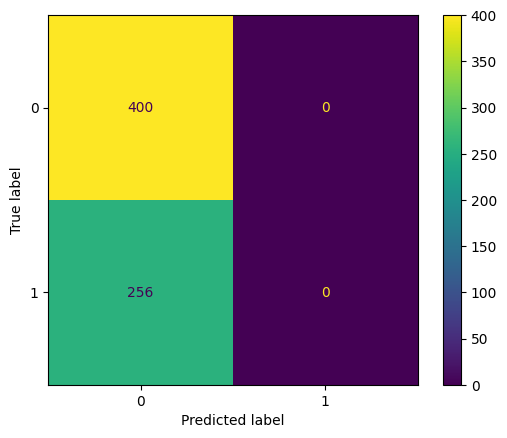

In [63]:

modelo_reg= LogisticRegression()
modelo_reg.fit(X_train, y_train)
y_pred_reg = modelo_reg.predict(X_test)
acc_reg = accuracy_score(y_test, y_pred_reg)*100

matrix_reg = confusion_matrix(y_test, y_pred_reg, labels=modelo_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_reg,
                              display_labels=modelo_reg.classes_)
disp.plot()

plt.show()

## Avaliação do modelo


In [64]:
f1_score = f1_score(y_true = y_test, y_pred = y_pred_reg)
print(f"f1_score: {f1_score}")

precision = precision_score(y_true = y_test, y_pred = y_pred_reg)
print(f"precision_score: {precision}")

recall = recall_score(y_true = y_test, y_pred = y_pred_reg)
print(f"recall_score: {recall}")

f1_score: 0.0
precision_score: 0.0
recall_score: 0.0


C:\Users\guilhermecosta-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Modelo 2: Classificador de Árvore de Decisão

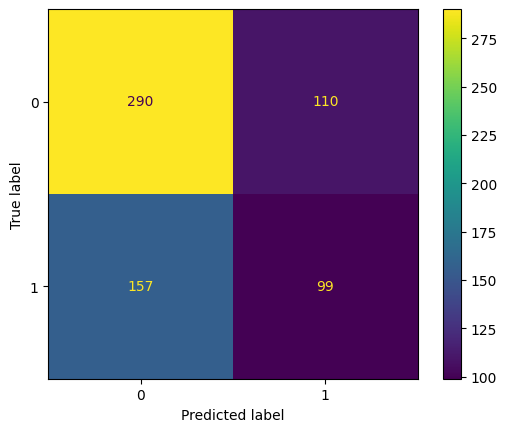

In [65]:
modelo_dt = DecisionTreeClassifier(criterion= 'gini', min_samples_split=10, splitter = "best")
modelo_dt.fit(X_train, y_train)
y_pred_dt = modelo_dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)*100

matrix_dt = confusion_matrix(y_test, y_pred_dt, labels=modelo_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_dt,
                              display_labels=modelo_dt.classes_)
disp.plot()

plt.show()

## Modelo 3: Classificador Random Forest

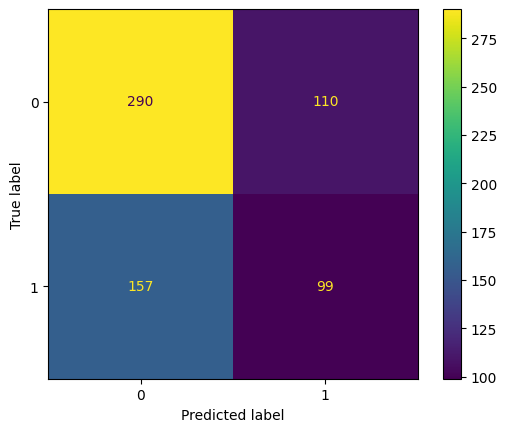

In [66]:

modelo_ranfor = RandomForestClassifier()
modelo_ranfor.fit(X_train, y_train)
y_pred_ranfor = modelo_ranfor.predict(X_test)
acc_ranfor = accuracy_score(y_test, y_pred_ranfor)*100

matrix_ranfor = confusion_matrix(y_test, y_pred_dt, labels=modelo_ranfor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_ranfor,
                              display_labels=modelo_dt.classes_)
disp.plot()

plt.show()

## Model 4: KNN

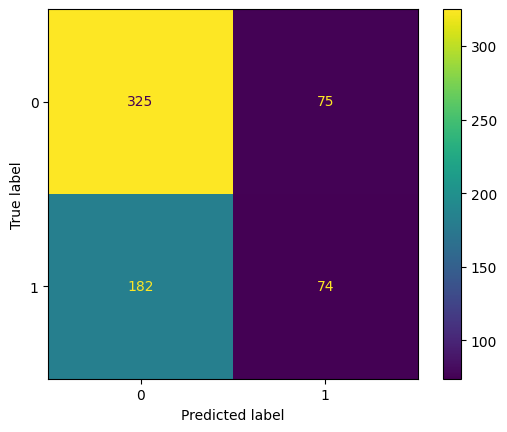

In [67]:
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train, y_train)
y_pred_knn = modelo_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)*100

matrix_knn = confusion_matrix(y_test, y_pred_knn, labels=modelo_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_knn,
                              display_labels=modelo_knn.classes_)
disp.plot()

plt.show()

## Model 5: Support Vector Classifier

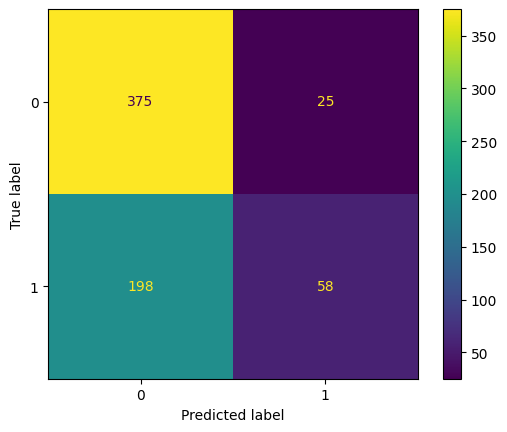

In [68]:
modelo_svm = SVC()
modelo_svm.fit(X_train, y_train)
y_pred_svm = modelo_svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)*100

matrix_svm = confusion_matrix(y_test, y_pred_svm, labels=modelo_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_svm,
                              display_labels=modelo_svm.classes_)
disp.plot()

plt.show()

## Model 6: Naive Bayes 

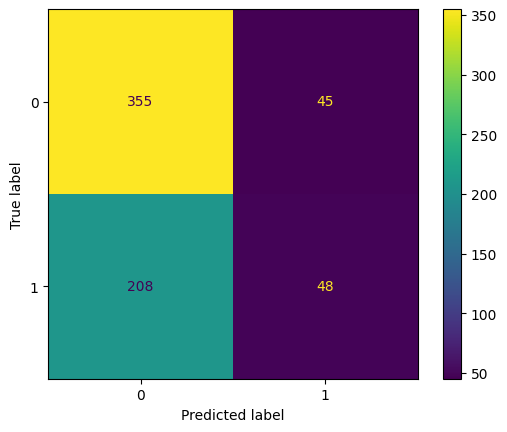

In [69]:
modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)
y_pred_nb = modelo_nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)*100


matrix_nb = confusion_matrix(y_test, y_pred_nb, labels=modelo_nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_nb,
                              display_labels=modelo_nb.classes_)
disp.plot()

plt.show()

## Model 6: XGBOOST

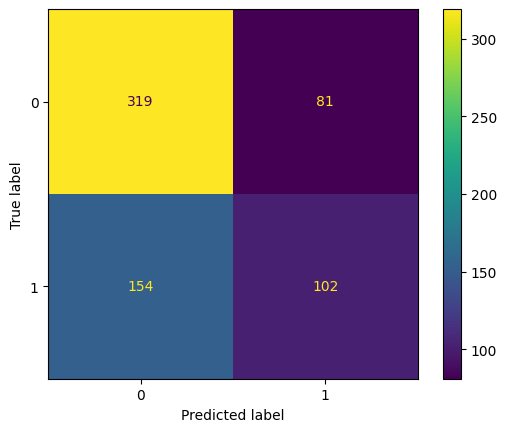

In [70]:

modelo_xgb = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
modelo_xgb.fit(X_train, y_train)
y_pred_xgb = modelo_xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)*100

matrix_xgb = confusion_matrix(y_test, y_pred_xgb, labels=modelo_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_xgb,
                              display_labels=modelo_xgb.classes_)
disp.plot()

plt.show()


## Model 6: LightGBM

[LightGBM] [Info] Number of positive: 1022, number of negative: 1598
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,001974 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,390076 -> initscore=-0,446991
[LightGBM] [Info] Start training from score -0,446991


C:\Users\guilhermecosta-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


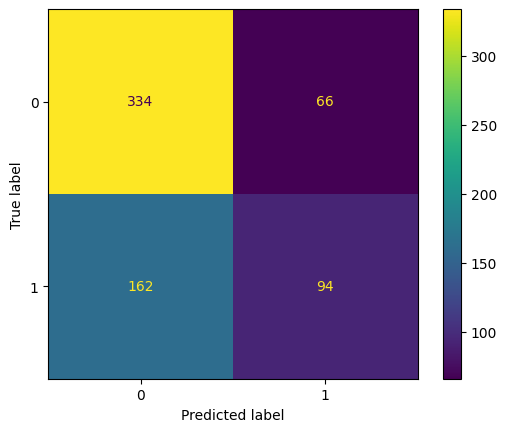

In [71]:
modelo_lgbm = LGBMClassifier(objective='binary', metric='logloss')
modelo_lgbm.fit(X_train, y_train)
y_pred_lgbm = modelo_lgbm.predict(X_test)
acc_lgbm = accuracy_score(y_test, y_pred_lgbm) * 100

matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm, labels=modelo_lgbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_lgbm,
                              display_labels=modelo_lgbm.classes_)
disp.plot()
plt.show()


## Model 6: catboost

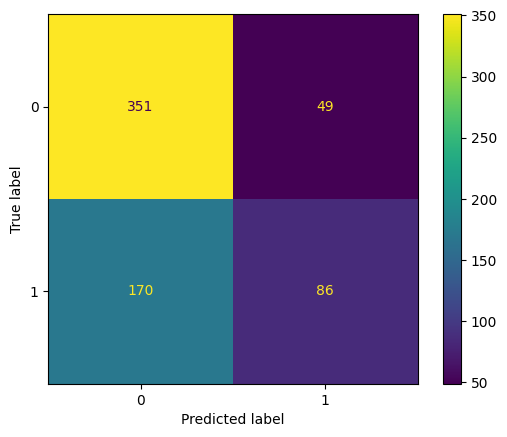

In [72]:
modelo_cat = CatBoostClassifier(objective='Logloss', verbose=0) 
modelo_cat.fit(X_train, y_train)
y_pred_cat = modelo_cat.predict(X_test)
acc_cat = accuracy_score(y_test, y_pred_cat) * 100

matrix_cat = confusion_matrix(y_test, y_pred_cat, labels=modelo_cat.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_cat,
                              display_labels=modelo_cat.classes_)
disp.plot()
plt.show()

In [73]:
print(acc_nb)
print(acc_svm)
print(acc_knn)
print(acc_ranfor)
print(acc_dt )
print(acc_reg)
print(acc_xgb)
print(acc_lgbm)
print(acc_cat)

61.4329268292683
66.0060975609756
60.82317073170732
67.98780487804879
59.29878048780488
60.97560975609756
64.17682926829268
65.2439024390244
66.61585365853658


## Avaliação geral das acuracias 

<table ><tr><th>Model</th> 
    <th>Accuracy</th>
    <tr><td>Naive Bayes </td><td> 61.43%</td></tr>
    <tr><td>Support Vector Classifier </td><td> 67.07%</td></tr>
    <tr><td> K-Nearest neighbors  </td><td> 61.89%</td></tr>
    <tr><td>Random Forest </td><td>67.98% </td></tr>
    <tr><td>Decision tree </td><td>59.29%</td></tr>
    <tr><td> Logistic Regresion </td><td> 60.97%</td></tr>
    <tr><td>XGBoost </td><td>64.17% </td></tr>
    <tr><td>LightGBM </td><td>65.09% </td></tr>
    <tr><td>catBoost </td><td>66.61% </td></tr>
    </table>

    

# Teste

In [ ]:
# from sklearn.model_selection import GridSearchCV


# param_grid = {
#     "n_estimators": [100, 300, 500],
#     "max_depth": [3, 5, 7],
#     "learning_rate": [0.01, 0.1, 0.2]
# }

# grid = GridSearchCV(
#     LGBMClassifier(objective="binary", metric="logloss", random_state=42),
#     param_grid,
#     cv=5,
#     scoring="accuracy",  
#     n_jobs=-1
# )

# grid.fit(X_train, y_train)
# print("Melhores parâmetros:", grid.best_params_)
# print("Melhor score (acc):", grid.best_score_)


[LightGBM] [Info] Number of positive: 1022, number of negative: 1598
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,390076 -> initscore=-0,446991
[LightGBM] [Info] Start training from score -0,446991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b